<a href="https://colab.research.google.com/github/LightningFryer/fml-assignment/blob/main/FML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("briscdataset/brisc2025")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brisc2025' dataset.
Path to dataset files: /kaggle/input/brisc2025


In [2]:
# preprocess imports
import os
from PIL import Image
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
# train folder of dataset
train = "/kaggle/input/brisc2025/brisc2025/classification_task/train"
test = "/kaggle/input/brisc2025/brisc2025/classification_task/test"

def load_data(data_dir):
    X = []
    y = []

    labels = os.listdir(data_dir)

    for label in tqdm(labels, desc=f"Loading images in {os.path.basename(data_dir)}"):
        class_dir = os.path.join(data_dir, label)
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            try:
                img = Image.open(img_path).convert("L")
                img = img.resize((128, 128))
                X.append(np.array(img).flatten())
                y.append(label)
            except:
                print(f"Error loading image {img_path}")
    return np.array(X), np.array(y)

X_train, y_train = load_data(train)
X_test, y_test = load_data(test)


In [4]:
# scikit-learn imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
# Logistic Regression Classifier
sc = StandardScaler()
X_train_LR = sc.fit_transform(X_train)
X_test_LR = sc.transform(X_test)

LRCLF = LogisticRegression(solver='lbfgs', max_iter=100, n_jobs=-1)
LRCLF.fit(X_train_LR, y_train)

LogisticRegression(n_jobs=-1)

Logistic Regression Accuracy = 0.615


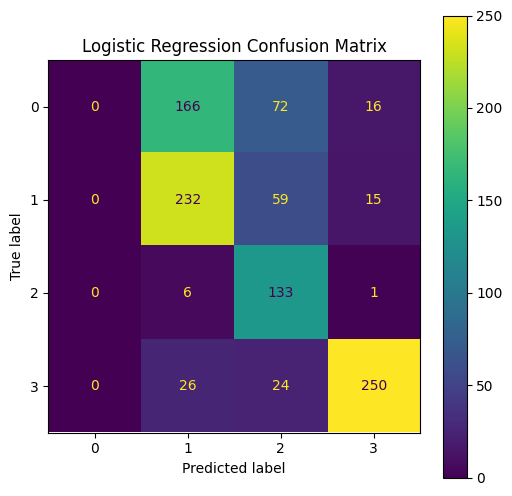

In [6]:
# Logistic Regression predictions and accuracies
y_pred_LR = LRCLF.predict(X_test)
print("Logistic Regression Accuracy =", accuracy_score(y_test, y_pred_LR))
cmLR = confusion_matrix(y_test, y_pred_LR)
cmDispLR = ConfusionMatrixDisplay(confusion_matrix=cmLR)
fig, ax = plt.subplots(figsize=(6, 6))
cmDispLR.plot(ax=ax)
ax.set_title("Logistic Regression Confusion Matrix")
plt.show()

In [7]:
# imports for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [8]:
# KNN Classifier Training
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_jobs=-1)

KNN Accuracy = 0.854


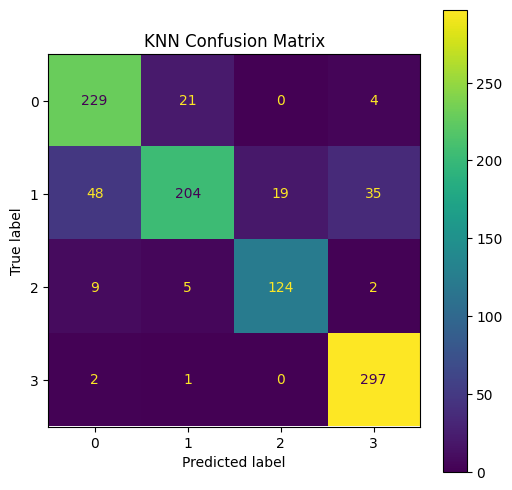

In [9]:
y_pred_KNN = knn.predict(X_test_pca)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("KNN Accuracy =", accuracy_KNN)
cmKNN = confusion_matrix(y_test, y_pred_KNN)
cmDispKNN = ConfusionMatrixDisplay(confusion_matrix=cmKNN)
fig, ax = plt.subplots(figsize=(6, 6))
cmDispKNN.plot(ax=ax)
ax.set_title("KNN Confusion Matrix")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

      glioma       0.86      0.59      0.70       254
  meningioma       0.71      0.86      0.77       306
    no_tumor       0.91      0.94      0.92       140
   pituitary       0.95      0.98      0.97       300

    accuracy                           0.84      1000
   macro avg       0.86      0.84      0.84      1000
weighted avg       0.85      0.84      0.83      1000



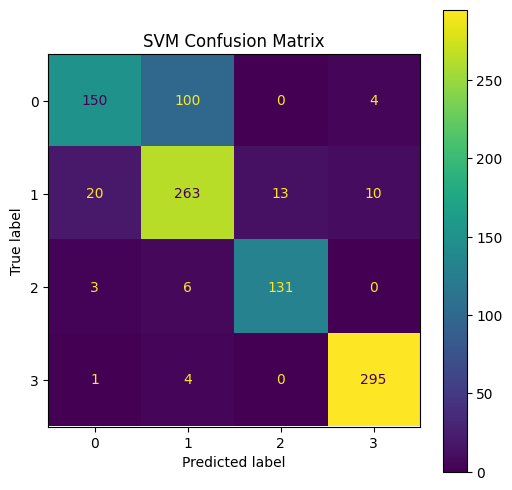

In [10]:
# SVM Training
from sklearn.svm import SVC

svc = SVC(kernel="rbf", max_iter=200)
svc.fit(X_train_pca, y_train)

In [50]:
y_pred_SVC = svc.predict(X_test_pca)

print(classification_report(y_test, y_pred_SVC))

cm = confusion_matrix(y_test, y_pred_SVC)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
ax.set_title("SVM Confusion Matrix")
plt.show()

ValueError: X has 20 features, but SVC is expecting 200 features as input.

In [11]:
# Naive Bayes Training
from sklearn.naive_bayes import GaussianNB
NBCLF = GaussianNB()
NBCLF.fit(X_train_pca, y_train)

GaussianNB()

Naive Bayes Classifier Accuracy = 0.506


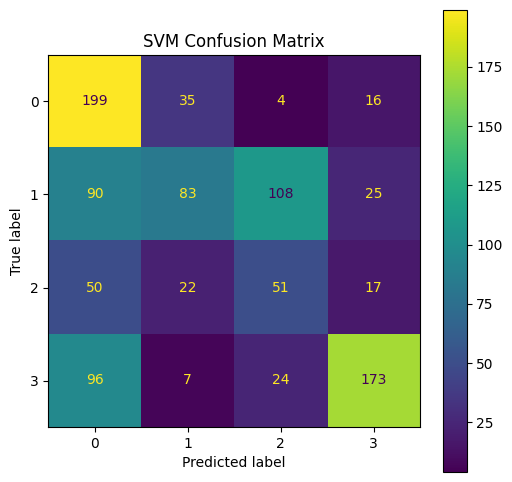

In [13]:
# Naive Bayes Predictions and Accuracies
y_pred_NB = NBCLF.predict(X_test_pca)
print("Naive Bayes Classifier Accuracy =", accuracy_score(y_test, y_pred_NB))

cm = confusion_matrix(y_test, y_pred_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
ax.set_title("SVM Confusion Matrix")
plt.show()

Classification Report:
              precision    recall  f1-score   support

      glioma       0.50      0.91      0.64       254
  meningioma       0.39      0.14      0.20       306
    no_tumor       0.51      0.66      0.58       140
   pituitary       0.82      0.67      0.74       300

    accuracy                           0.57      1000
   macro avg       0.55      0.59      0.54      1000
weighted avg       0.56      0.57      0.53      1000



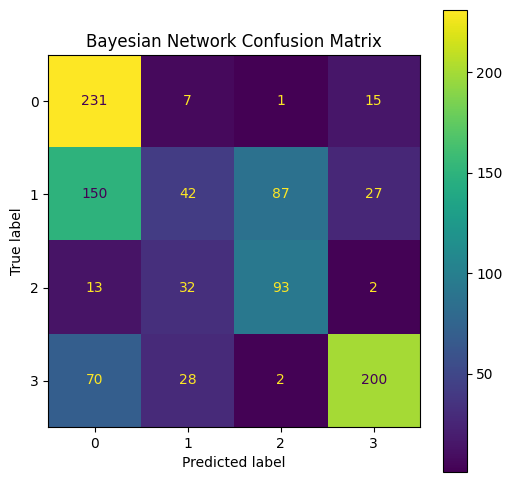

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Normalize pixel values
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_normalized, y_train_encoded)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.50      0.91      0.64       254
  meningioma       0.39      0.14      0.20       306
    no_tumor       0.51      0.66      0.58       140
   pituitary       0.82      0.67      0.74       300

    accuracy                           0.57      1000
   macro avg       0.55      0.59      0.54      1000
weighted avg       0.56      0.57      0.53      1000



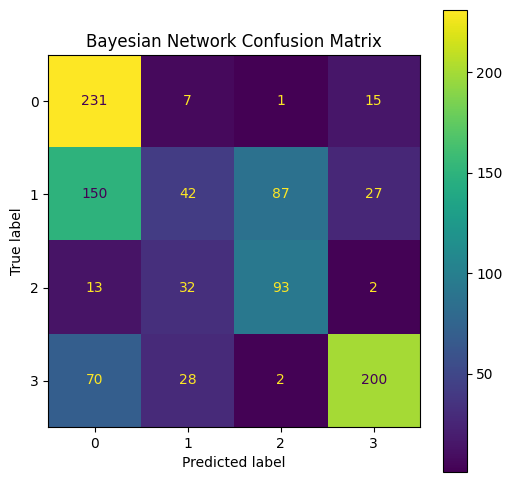

In [51]:
# Predict
y_pred_BN = nb_model.predict(X_test_normalized)

# Evaluate
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_BN, target_names=le.classes_))
cmBN = confusion_matrix(y_test_encoded, y_pred_BN)
disp = ConfusionMatrixDisplay(confusion_matrix=cmBN)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
ax.set_title("Bayesian Network Confusion Matrix")
plt.show()

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train_encoded)

Accuracy: 0.851

Classification Report:
              precision    recall  f1-score   support

      glioma       0.82      0.80      0.81       254
  meningioma       0.79      0.82      0.81       306
    no_tumor       0.92      0.96      0.94       140
   pituitary       0.90      0.88      0.89       300

    accuracy                           0.85      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.85      0.85      0.85      1000

Classification Report:
              precision    recall  f1-score   support

      glioma       0.82      0.80      0.81       254
  meningioma       0.79      0.82      0.81       306
    no_tumor       0.92      0.96      0.94       140
   pituitary       0.90      0.88      0.89       300

    accuracy                           0.85      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.85      0.85      0.85      1000



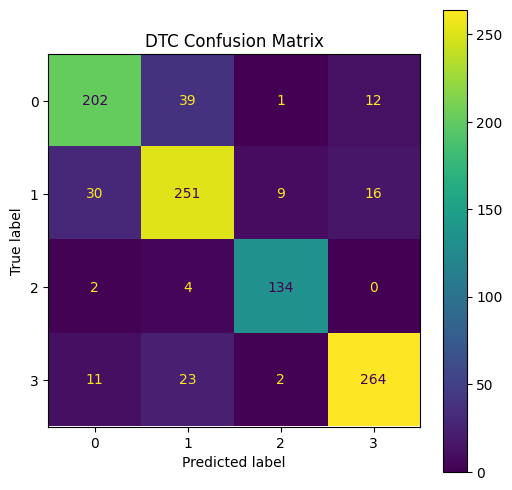

In [44]:
# Predictions for DTC
y_pred_DTC = dtc.predict(X_test)
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_DTC))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_DTC, target_names=le.classes_))

print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_DTC, target_names=le.classes_))
cmDTC = confusion_matrix(y_test_encoded, y_pred_DTC)
disp = ConfusionMatrixDisplay(confusion_matrix=cmDTC)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
ax.set_title("DTC Confusion Matrix")
plt.show()

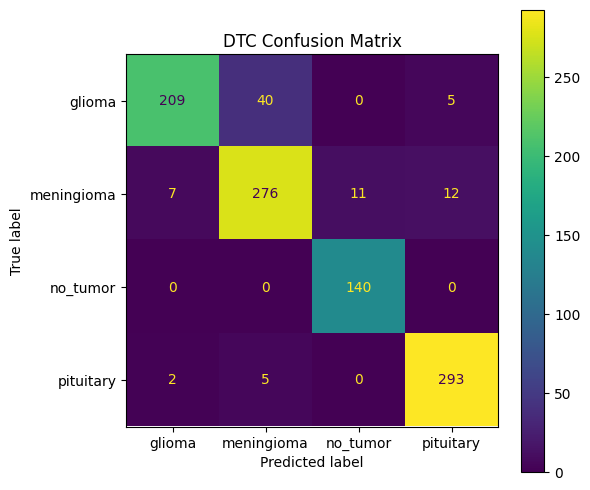

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_encoded)

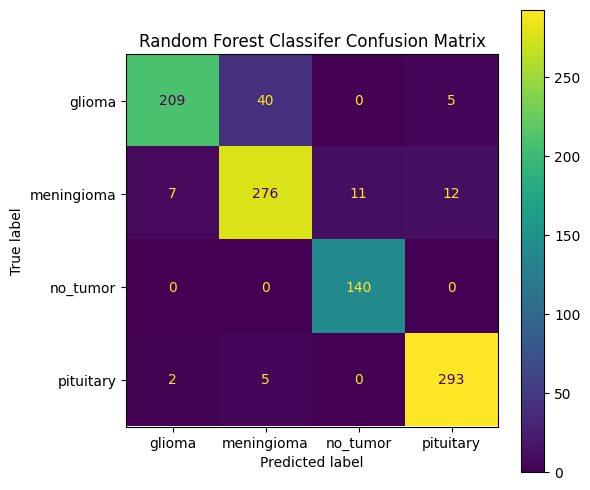

In [53]:
y_pred_RF = rf.predict(X_test)

cmDTC = confusion_matrix(y_test_encoded, y_pred_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cmDTC, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
ax.set_title("Random Forest Classifer Confusion Matrix")
plt.show()

In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

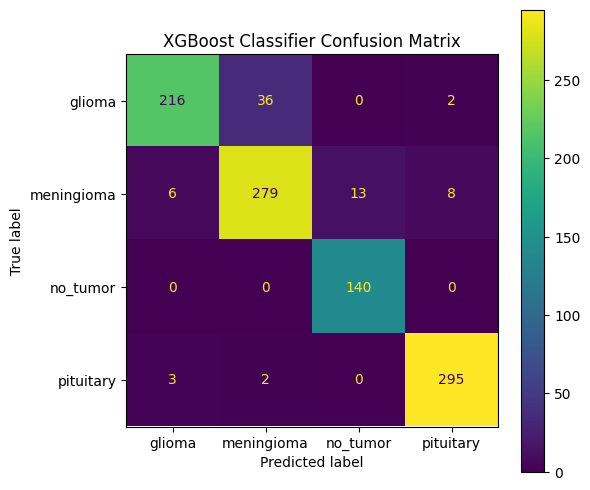

In [55]:
y_pred_XGB = xgb.predict(X_test)

cmXGB = confusion_matrix(y_test_encoded, y_pred_XGB)
disp = ConfusionMatrixDisplay(confusion_matrix=cmXGB, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
ax.set_title("XGBoost Classifier Confusion Matrix")
plt.show()

In [56]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train_encoded)

AdaBoostClassifier(random_state=42)

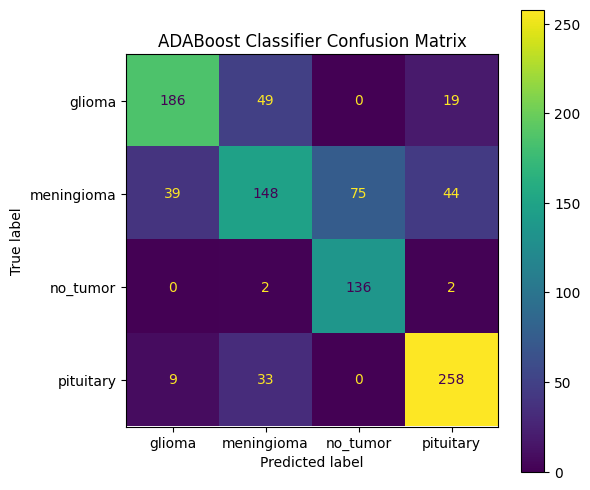

In [57]:
y_pred_ada = ada.predict(X_test)

cmada = confusion_matrix(y_test_encoded, y_pred_ada)
disp = ConfusionMatrixDisplay(confusion_matrix=cmada, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
ax.set_title("ADABoost Classifier Confusion Matrix")
plt.show()

In [58]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train_encoded)

MLPClassifier(random_state=42)

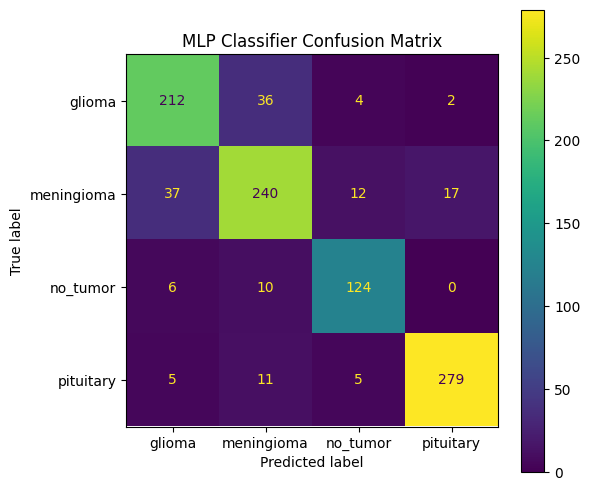

In [59]:
y_pred_MLP = mlp.predict(X_test)

cmMLP = confusion_matrix(y_test_encoded, y_pred_MLP)
disp = ConfusionMatrixDisplay(confusion_matrix=cmMLP, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
ax.set_title("MLP Classifier Confusion Matrix")
plt.show()

In [67]:
print("Classification Reports:\n")
print("Classification Report: Logistic Regression Classifier")
print(classification_report(y_test, y_pred_LR))

print("Classification Report: KNN Classifier")
print(classification_report(y_test, y_pred_KNN))

print("Classification Report: Support Vector Machine")
print(classification_report(y_test, y_pred_SVC))

print("Classification Report: Naive Bayes Classifier")
print(classification_report(y_test, y_pred_NB))

print("Classification Report: Bayesian Network Classifier")
print(classification_report(y_test_encoded, y_pred_BN))

print("Classification Report: Decision Tree Classifier")
print(classification_report(y_test_encoded, y_pred_DTC))

print("Classification Report: Random Forest Classifier")
print(classification_report(y_test_encoded, y_pred_RF))

print("Classification Report: XGBoost Classifier")
print(classification_report(y_test_encoded, y_pred_XGB))

print("Classification Report: AdaBoost Classifier")
print(classification_report(y_test_encoded, y_pred_ada))

print("Classification Report: Multilayer Perceptron Classifier")
print(classification_report(y_test_encoded, y_pred_MLP))

Classification Reports:

Classification Report: Logistic Regression Classifier
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       254
  meningioma       0.54      0.76      0.63       306
    no_tumor       0.46      0.95      0.62       140
   pituitary       0.89      0.83      0.86       300

    accuracy                           0.61      1000
   macro avg       0.47      0.64      0.53      1000
weighted avg       0.50      0.61      0.54      1000

Classification Report: KNN Classifier
              precision    recall  f1-score   support

      glioma       0.80      0.90      0.85       254
  meningioma       0.88      0.67      0.76       306
    no_tumor       0.87      0.89      0.88       140
   pituitary       0.88      0.99      0.93       300

    accuracy                           0.85      1000
   macro avg       0.86      0.86      0.85      1000
weighted avg       0.86      0.85      0.85      1000

Classificatio

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
